https://w2.weather.gov/climate/local_data.php?wfo=car

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# excel

In [121]:
xl = pd.read_excel("data/bangor_climate.xlsx")
#xl = pd.read_excel("data/caribou_climate.xlsx")

In [122]:
data = xl[["Date", " MaxTemperature"]]
data.columns = ["date", "tmax"]
data = data[data["tmax"] != " M"]
data["tmax"] = data["tmax"].astype("float")
data["date"] = pd.to_datetime(data['date'])
data['basedate'] = (data['date'] - pd.to_datetime('1800-01-01')).apply(lambda x: x.days)
slope, intercept = np.polyfit(data['basedate'],data['tmax'], 1)
data['linear'] = slope * data['basedate'] + intercept

# csv

In [139]:
csv = pd.read_csv("data/winchester.csv")

In [141]:
csv.isnan()

AttributeError: 'DataFrame' object has no attribute 'isnan'

In [138]:
data = csv.copy()
data["tmax"] = data["tmax"].astype("float")
data['date'] = pd.to_datetime(data['date'])
data['basedate'] = (data['date'] - pd.to_datetime('1800-01-01')).apply(lambda x: x.days)
slope, intercept = np.polyfit(data['basedate'],data['tmax'], 1)
data['linear'] = slope * data['basedate'] + intercept
print(slope, intercept)

nan nan


In [123]:
data.iloc[0,0].date()

datetime.date(1925, 12, 1)

In [41]:
df = xl.parse(xl.sheet_names[0])
df = df.rename(columns={'Date':'date', ' MaxTemperature': 'tmax'})
df = df.loc[:,['date', 'tmax']]
df = df[['date','tmax']].replace(' M', np.nan)
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df['basedate'] = (df['date'] - pd.to_datetime('1800-01-01')).apply(lambda x: x.days)
slope, intercept = np.polyfit(df['basedate'],df['tmax'], 1)
df['linear'] = slope * df['basedate'] + intercept
print(df.describe())
print(slope, intercept)

               tmax      basedate        linear
count  32716.000000  32716.000000  32716.000000
mean      54.815106  63334.773230     54.815106
std       20.560670   9849.469976      0.400530
min       -6.000000  45989.000000     54.136558
25%       38.000000  54534.750000     54.469595
50%       56.000000  63641.500000     54.802633
75%       73.000000  71831.250000     55.172960
max      104.000000  80021.000000     55.520475
-4.0665165783889144e-05 57.390624811942274


In [132]:
data.head()

,date,tmax,basedate,linear
0,1912-04-01,69.0,40997,NaN
1,1912-04-02,75.0,40998,NaN
2,1912-04-03,61.0,40999,NaN
3,1912-04-04,63.0,41000,NaN
4,1912-04-05,71.0,41001,NaN


<AxesSubplot:xlabel='basedate', ylabel='tmax'>

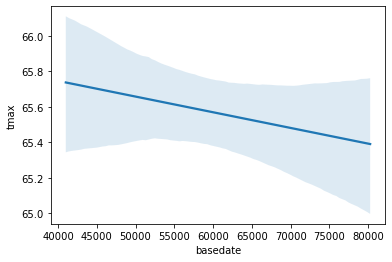

In [134]:
sns.regplot(data=data,x="basedate",y="tmax",scatter=False)

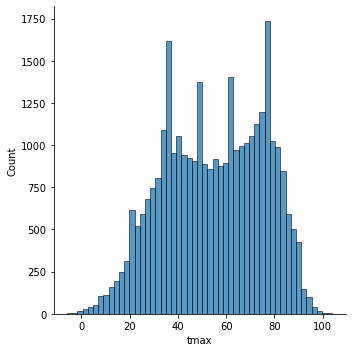

In [126]:
sns.displot(data["tmax"])

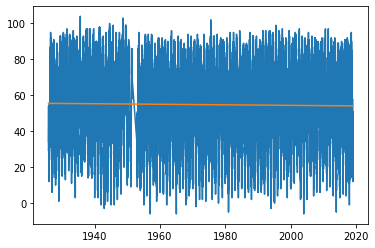

In [127]:
plt.plot('date', 'tmax', data=data)
plt.plot('date', 'linear', data=data)

https://www.ncdc.noaa.gov/cdo-web/datatools/findstation

In [11]:
#df = pd.read_csv("data/billings.csv")
#df = pd.read_csv("data/bozeman.csv")
#df = pd.read_csv("data/mandan.csv")
df = pd.read_csv("data/parkersburg.csv")
#df = pd.read_csv("data/superior.csv")
#df = pd.read_csv("data/winchester.csv")
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df['basedate'] = (df['date'] - pd.to_datetime('1800-01-01')).apply(lambda x: x.days)
slope, intercept = np.polyfit(df['basedate'],df['tmax'], 1)
df['linear'] = slope * df['basedate'] + intercept
print(df.describe())
print(slope, intercept)

               tmax      basedate        linear
count  33426.000000  33426.000000  33426.000000
mean      64.770149  62786.390804     64.770149
std       19.450735   9718.656125      0.088546
min       -4.000000  46020.000000     64.617392
25%       49.000000  54381.250000     64.693570
50%       68.000000  62741.500000     64.769740
75%       82.000000  71143.750000     64.846292
max      105.000000  80246.000000     64.929222
9.11092837628591e-06 64.19810667620254


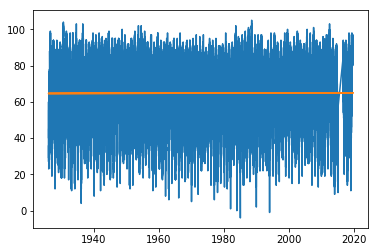

In [12]:
plt.plot('date', 'tmax', data=df)
plt.plot('date', 'linear', data=df)

In [13]:
df[(df['date'] == df['date'].min()) | (df['date'] == df['date'].max())]

,date,tmax,basedate,linear
515,1926-01-01,40.0,46020,64.617392
34158,2019-09-16,89.0,80246,64.929222


103.67161945220073
             tmax      basedate      linear
count    3.000000      3.000000    3.000000
mean   104.333333  61805.333333  104.333333
std      0.577350  12225.103285    0.288696
min    104.000000  47689.000000  103.999976
25%    104.000000  58276.000000  104.249988
50%    104.000000  68863.000000  104.500000
75%    104.500000  68863.500000  104.500012
max    105.000000  68864.000000  104.500024
2.361498118615682e-05 102.87380154946251


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


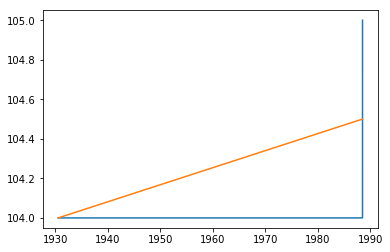

In [19]:
high = df['tmax'].mean() + 2 * df['tmax'].std()
print(high)
max = df[df['tmax'] > high]
max.is_copy = None  # we actually want a copy

slope, intercept = np.polyfit(max['basedate'],max['tmax'], 1)
max['linear'] = slope * max['basedate'] + intercept
print(max.describe())
print(slope, intercept)

plt.plot('date', 'tmax', data=max)
plt.plot('date', 'linear', data=max)

In [15]:
max

,date,tmax,basedate,linear
1669,1930-07-28,104.0,47689,103.999976
22809,1988-07-17,104.0,68863,104.500000
22810,1988-07-18,105.0,68864,104.500024


25.868678519438106
             tmax      basedate      linear
count  680.000000    680.000000  680.000000
mean    20.302941  62975.833824   20.302941
std      4.546211   9363.700270    0.032812
min     -4.000000  46042.000000   20.243603
25%     18.000000  55422.500000   20.276473
50%     22.000000  63193.500000   20.303704
75%     24.000000  69527.500000   20.325899
max     25.000000  80020.000000   20.362666
3.5041382684682686e-06 20.082265147180866


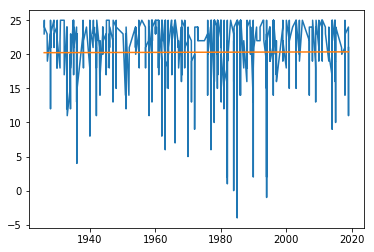

In [16]:
low = df['tmax'].mean() - 2 * df['tmax'].std()
print(low)
min = df[df['tmax'] < low]
min.is_copy = None  # we actually want a copy

slope, intercept = np.polyfit(min['basedate'],min['tmax'], 1)
min['linear'] = slope * min['basedate'] + intercept
print(min.describe())
print(slope, intercept)

plt.plot('date', 'tmax', data=min)
plt.plot('date', 'linear', data=min)

In [17]:
min

,date,tmax,basedate,linear
5,1926-01-23,23.0,46042,20.243603
23,1926-02-10,25.0,46060,20.243666
24,1926-02-11,24.0,46061,20.243669
334,1926-12-18,23.0,46371,20.244756
362,1927-01-15,19.0,46399,20.244854
363,1927-01-16,19.0,46400,20.244857
707,1927-12-09,23.0,46727,20.246003
717,1927-12-19,21.0,46737,20.246038
730,1928-01-01,20.0,46750,20.246084
731,1928-01-02,12.0,46751,20.246087


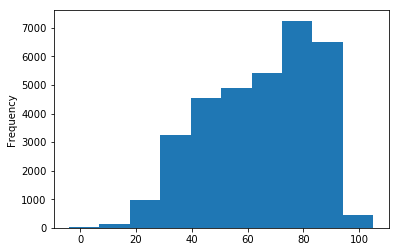

In [18]:
plt.figure()
df['tmax'].plot.hist()